# **Detector de fraudes en pagos vía online**

Fuente: https://www.kaggle.com/datasets/ealaxi/paysim1?resource=download

Con el auge de las nuevas Tecnologías de Información y Comunicación, el uso de plataformas online para diferentes fines ha crecido exponencialmente. En relativamente poco tiempo pasamos de usar efectivo a usar tarjetas de crédito y débito.

Si bien estos cambios han facilitado las transacciones monetarias en el ámbito cibernético, las complicaciones de esta tecnología en expansión no se han hecho esperar, siendo una de estas las acciones de pago fraudulento en sus diversas modalidades

**Librerías necesarias**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DataSetsAny/Payments-fraud.csv')
df1.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Dimensiones del dataset
df1.shape

(6362620, 11)

Podemos observar de primera instancia que contamos con un dataset robusto, lo cual puede considerarse una ventaja ya que podríamos tener resultados más precisos.

**COLUMNAS**

**step:** representa una unidad de tiempo, en donde 1 siginifica una hora

**type:** Tipo de transaccio en línea

**amount:** Monto de la transacción

**nameOrig:** Cliente que inicia la transacción

**oldbalanceOrg:** Saldo antes de la transacción

**newbalanceOrig:** Saldo después de la transacción

**nameDest:** Destinatario de la transacción

**oldbalanceDest:** saldo inicial del destinatario antes de la transacción

**newbalanceDest:** nuevo saldo del destinatario después de la transacción

**isFraud:** Transacción Fraude

In [ ]:
#Obtenemos el nombre de las columnas contenidas en el dataset
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
#Verificamos si tenemos valores nulos en nuestras columnas
df1.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Contamos con un dataset en donde no tenemos ningún dato Nulo.

In [ ]:
# Por convencion, decidimos cambiar la estructura del nombre de nuestras columnas
column_name_mapping = {
    'step': 'hour_step',
    'type': 'trans_type',
    'amount': 'amount',
    'nameOrig': 'orig_client',
    'oldbalanceOrg': 'orig_old_balance',
    'newbalanceOrig': 'orig_new_balance',
    'nameDest': 'dest_client',
    'oldbalanceDest': 'dest_old_balance',
    'newbalanceDest': 'dest_new_balance',
    'isFraud': 'is_fraud',
    'isFlaggedFraud': 'is_flagged_fraud',
}

In [ ]:
#Asignamos los nuevos nombres de nuestras columnas al dataset
df1 = df1.rename(columns=column_name_mapping)

In [ ]:
# Se comprueba que los nombres de las columnas han sido cambiados
df1.head(5)

,hour_step,trans_type,amount,orig_client,orig_old_balance,orig_new_balance,dest_client,dest_old_balance,dest_new_balance,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Obtenemos el tipo de dato de nuestras columnas para realizar análisis
df1.dtypes

hour_step             int64
trans_type           object
amount              float64
orig_client          object
orig_old_balance    float64
orig_new_balance    float64
dest_client          object
dest_old_balance    float64
dest_new_balance    float64
is_fraud              int64
is_flagged_fraud      int64
dtype: object

Tomaremos algunas variables para hacer analisis de variables numéricas y categóricas, en este caso usamos la variable numerica "amount", y como variable categórica "trans_type" para evaluar cuál es el tipo de transacción más utilizada.

In [ ]:
#Obtenemos estimados de locacion variable amount
print('Estimados de locacion')
print('amount')
print('Media:',df1['amount'].mean())
print('Mediana:',df1['amount'].median())
print('Media truncada:', stats.trim_mean(df1['amount'], 0.1))
print('Desv. estandar:', df1['amount'].std())

Estimados de locacion
amount
Media: 179861.90354913071
Mediana: 74871.94
Media truncada: 107007.98284970847
Desv. estandar: 603858.2314629358


Podemos observar que tenemos una media muy alejada de nuestra mediana, esto es comprensible debido a que estamos hablando de montos en transacciones, entonces pueden existir usuarios con mayor movimiento en sus montos.

In [ ]:
# Obtenemos estimados de variabilidad
print('Estimados de variabilidad')
print('purchase_amount')
print('Valor minimo: ', df1['amount'].min())
print('Percentil 10:',df1['amount'].quantile(0.10))
print('Percentil 25:',df1['amount'].quantile(0.25))
print('Percentil 50:',df1['amount'].quantile(0.50))
print('Percentil 75:',df1['amount'].quantile(0.75))
print('Percentil 90:',df1['amount'].quantile(0.90))
print('Valor maximo:',df1['amount'].max())

Estimados de variabilidad
purchase_amount
Valor minimo:  0.0
Percentil 10: 4501.3
Percentil 25: 13389.57
Percentil 50: 74871.94
Percentil 75: 208721.4775
Percentil 90: 365423.30900000007
Valor maximo: 92445516.64


Analizando los resultados, podemos comprobar que hay un cambio immportante e monto del percentil 50 al 75, por eso nuestra media es más alta que nuestra mediana, porque tenemos una mayor acumulación de datos de montos altos.

<Axes: xlabel='amount'>

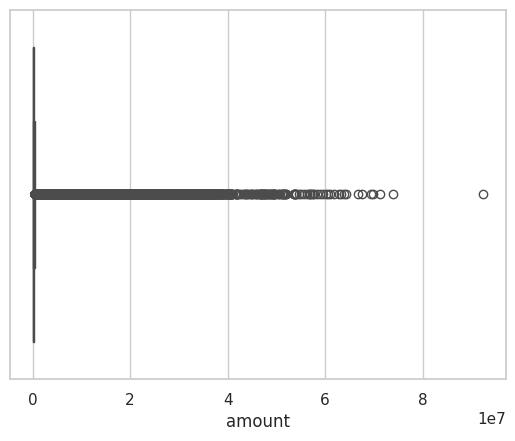

In [ ]:
# Realizamos una boxplot de nuestros datos para tener una mejor visualización de la probable existencia
# de valores atípicos.
sns.set(style="whitegrid")
sns.boxplot(x=df1['amount'])

Es posible observar que tenemos una gran proporción de datos atípicos en nuestro dataset, derivado del analisis anterior en donde se mencionó que hay una gran cantidad de montos elevados. Es por eso que decidimos recortar con un filtrados nuestros datos.

In [ ]:
# Realizamos el filtrado de nuestros datos atípicos
iqr_purchase = df1['amount'].quantile(0.75)- df1['amount'].quantile(0.25)
filtro_infPurchase = df1['amount'] > df1['amount'].quantile(0.25) - (1.5 * iqr_purchase)
filtro_supPurchase = df1['amount'] < df1['amount'].quantile(0.75) + (1.5 * iqr_purchase)

df_purchaseFil = df1[filtro_infPurchase & filtro_supPurchase]
df_purchaseFil

,hour_step,trans_type,amount,orig_client,orig_old_balance,orig_new_balance,dest_client,dest_old_balance,dest_new_balance,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0


<Axes: xlabel='amount'>

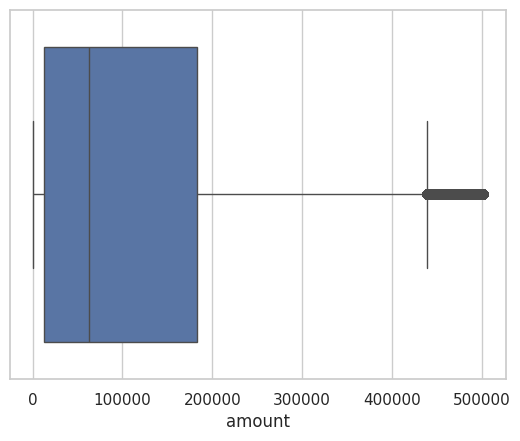

In [ ]:
# Volvemos a graficar nuestro dataset, esta vez con los datos filtrados
sns.set(style="whitegrid")
sns.boxplot(x=df_purchaseFil['amount'])

Aplicando el filtrado, podemos observar una gráfica más equilibrada.

## **EXPLORACIÓN DE VARIABLES CATEGÓRICAS**

Contamos con una variable categorica potencial, la cual es el tipo de transaccion. Con la información que podamos obtener, podemos obtener una posible hipotesis de cuál es el tipo que recibe más fraudes.

In [ ]:
#Obtenemos los tipos de transacciones
df1['trans_type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
#Obtenemos el conteo para cada tipo de transacción
transact = df1['trans_type'].value_counts()
transact

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: trans_type, dtype: int64

[Text(0, 0.5, 'Conteo')]

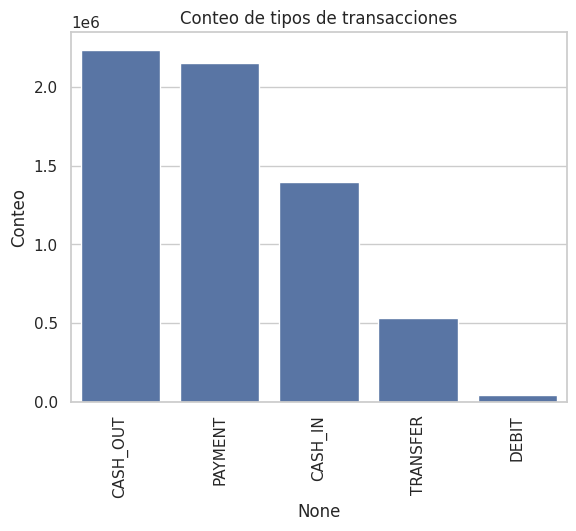

In [ ]:
#Graficamos nuestros tipos de transacciones
ax = sns.barplot(x=transact.index, y=transact)
ax.set_title('Conteo de tipos de transacciones')
plt.xticks(rotation=90)
ax.set(ylabel='Conteo')

Graficamente, podemos darle una mejor interpretación a nuestros resultados. Siendo estos los que nos indican que tenemos una mayor poporcion en movimientos de retiros y pagos.

In [ ]:
import plotly.express as px
transacciones = transact.index
quantity = transact.values
figure = px.pie(df1,
             values=quantity,
             names=transacciones,hole = 0.5,
             title="Distribucion de tipos de transacciones.")
figure.show()

También utilizamos otro método de visualización que es una gráfica circular para poder observar mejor la proporción de nuestros datos.

In [ ]:
#Correlacion entre variables del dataset
correlacion = df1.corr()
correlacion1 = df_purchaseFil.corr()
correlacion

<ipython-input-21-2bb726e0b601>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-21-2bb726e0b601>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,hour_step,amount,orig_old_balance,orig_new_balance,dest_old_balance,dest_new_balance,is_fraud,is_flagged_fraud
hour_step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
orig_old_balance,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
orig_new_balance,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
dest_old_balance,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
dest_new_balance,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
is_fraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
is_flagged_fraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


Observando los valores obtenidos de la correlación de nuestro dataset, es posible ver que tenemos dos pares de variables que tienen una alto valor de correlación las cuales son:

- orig_new_balance || orig_old_balance
- dest_old_balance || dest_new_balance

Que son referidas al saldo de la cuenta antes y después de realizar una transacción, tanto del mismo usuario como el usuario destinatario involucrado.

Serán estas variables las utilizadas para nuestro algoritmo de Machine Learning.

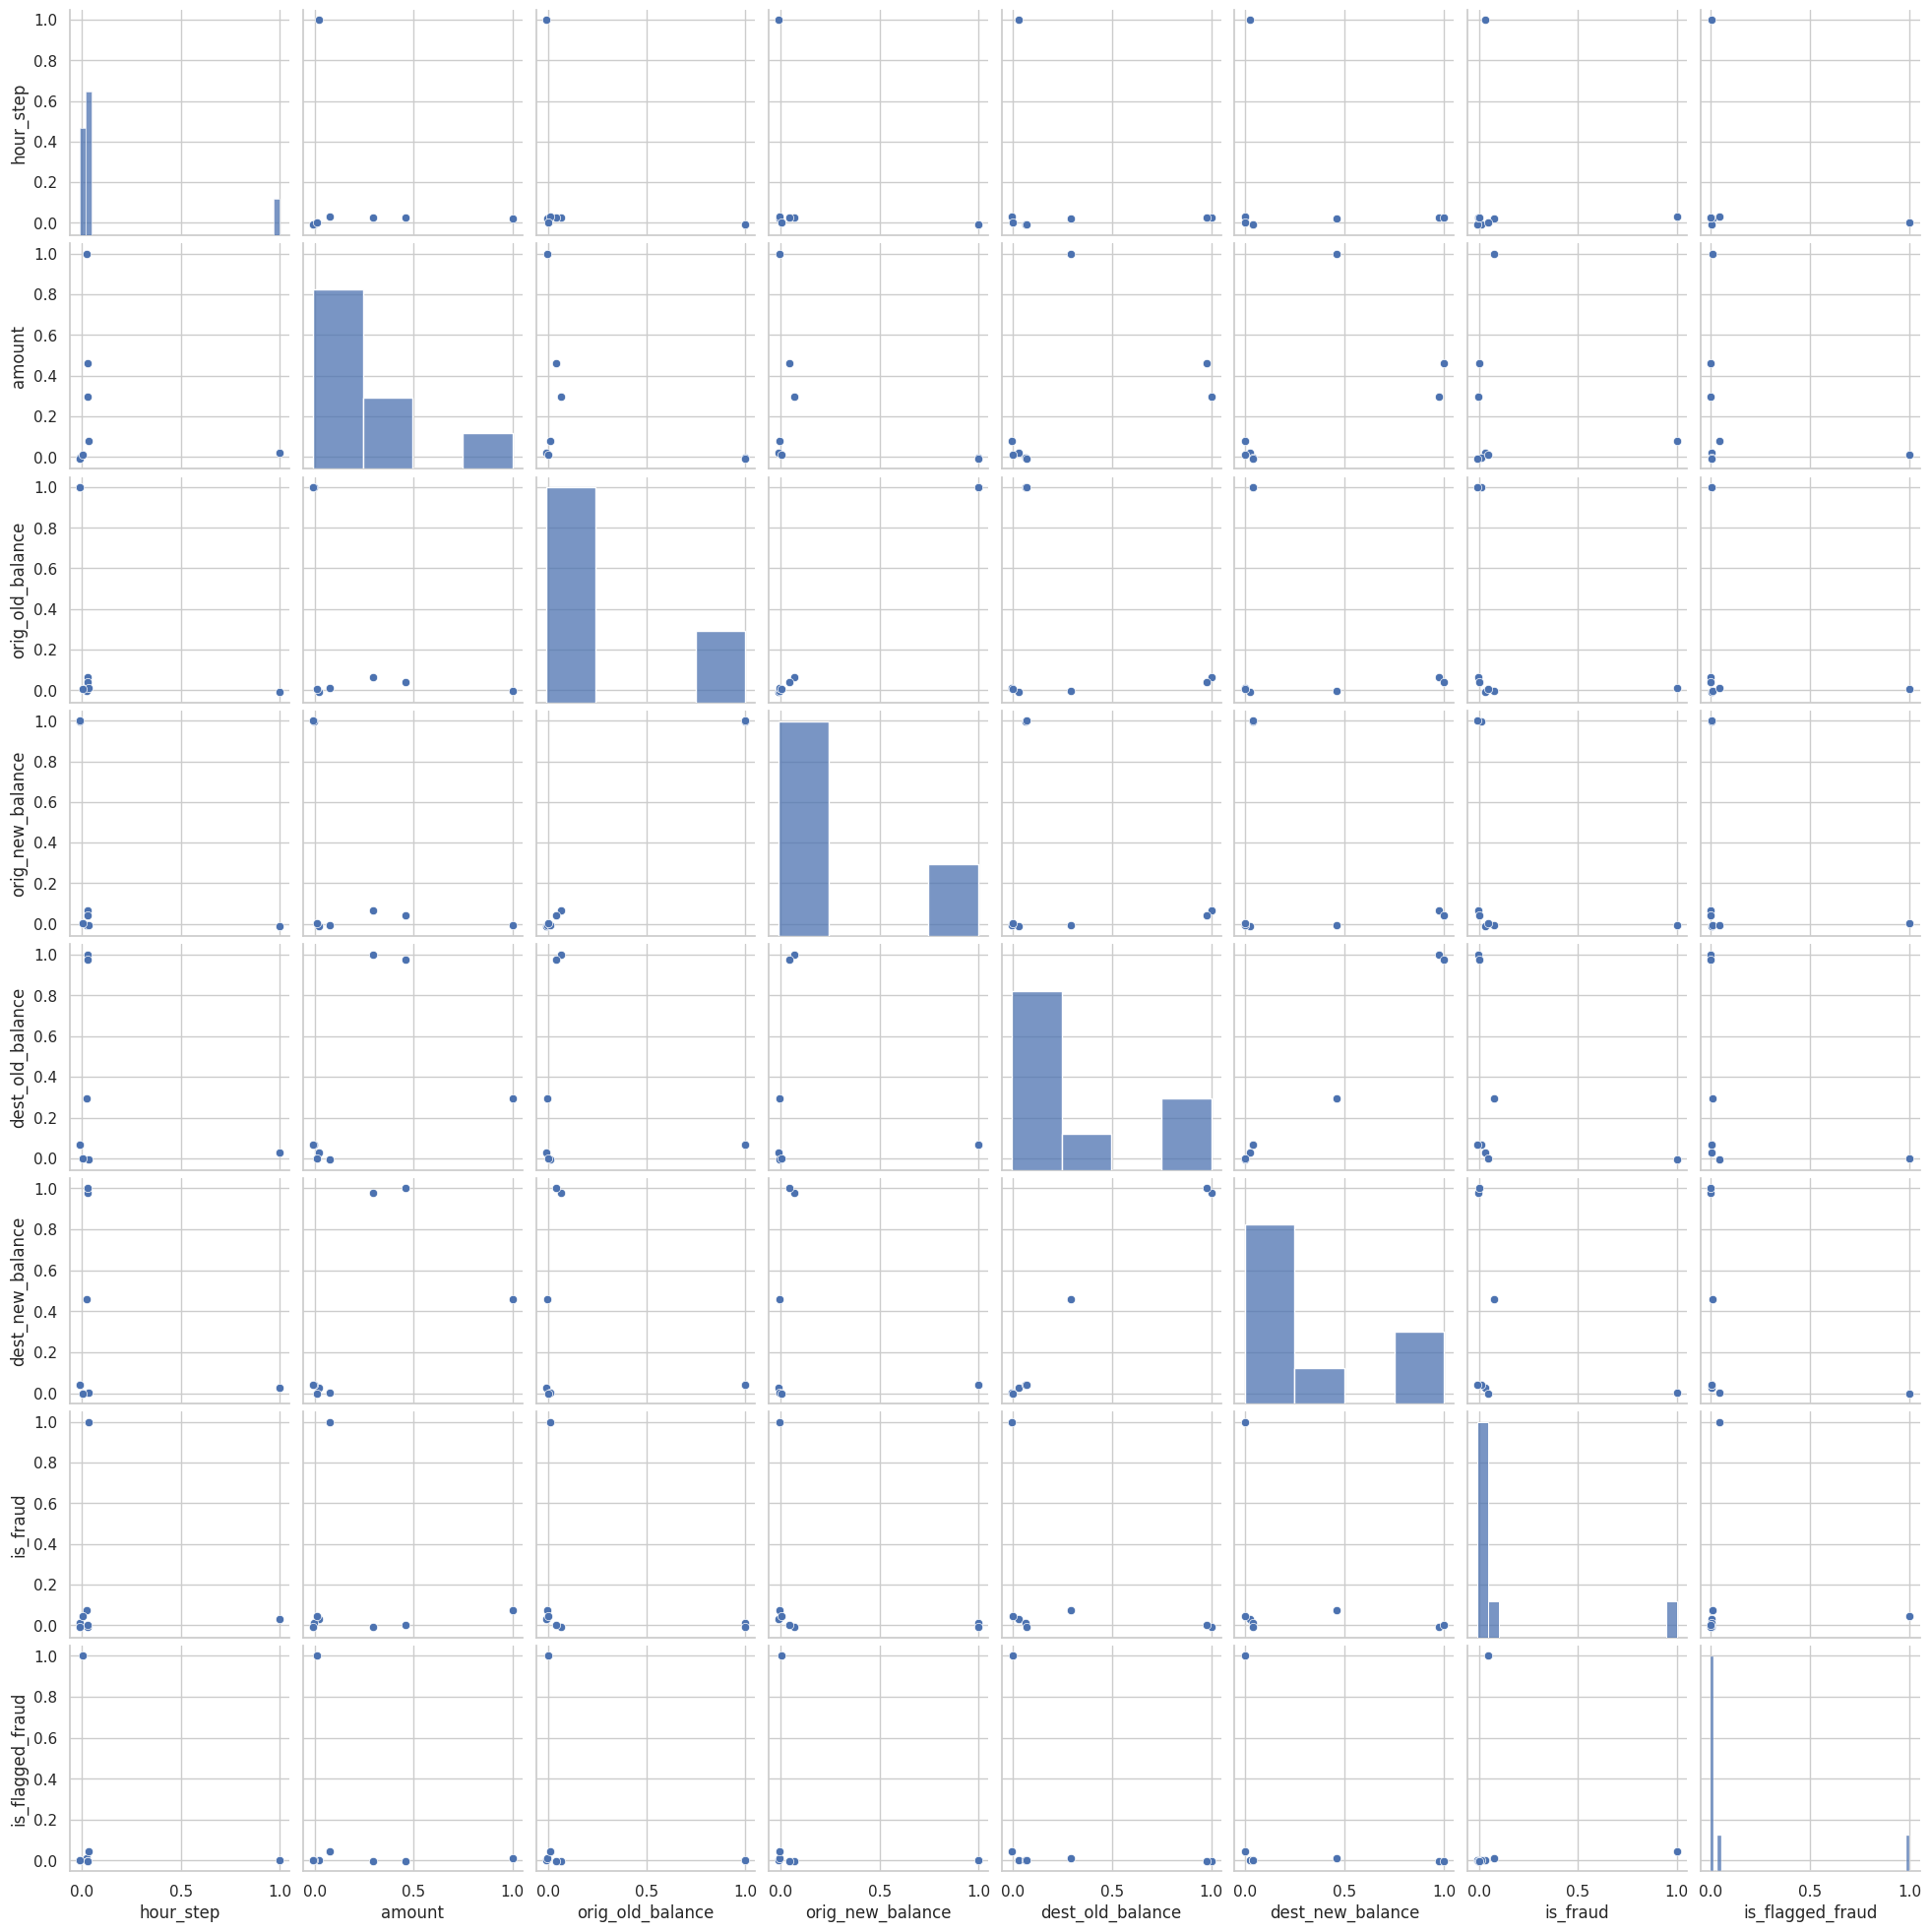

In [ ]:
sns.pairplot(correlacion)

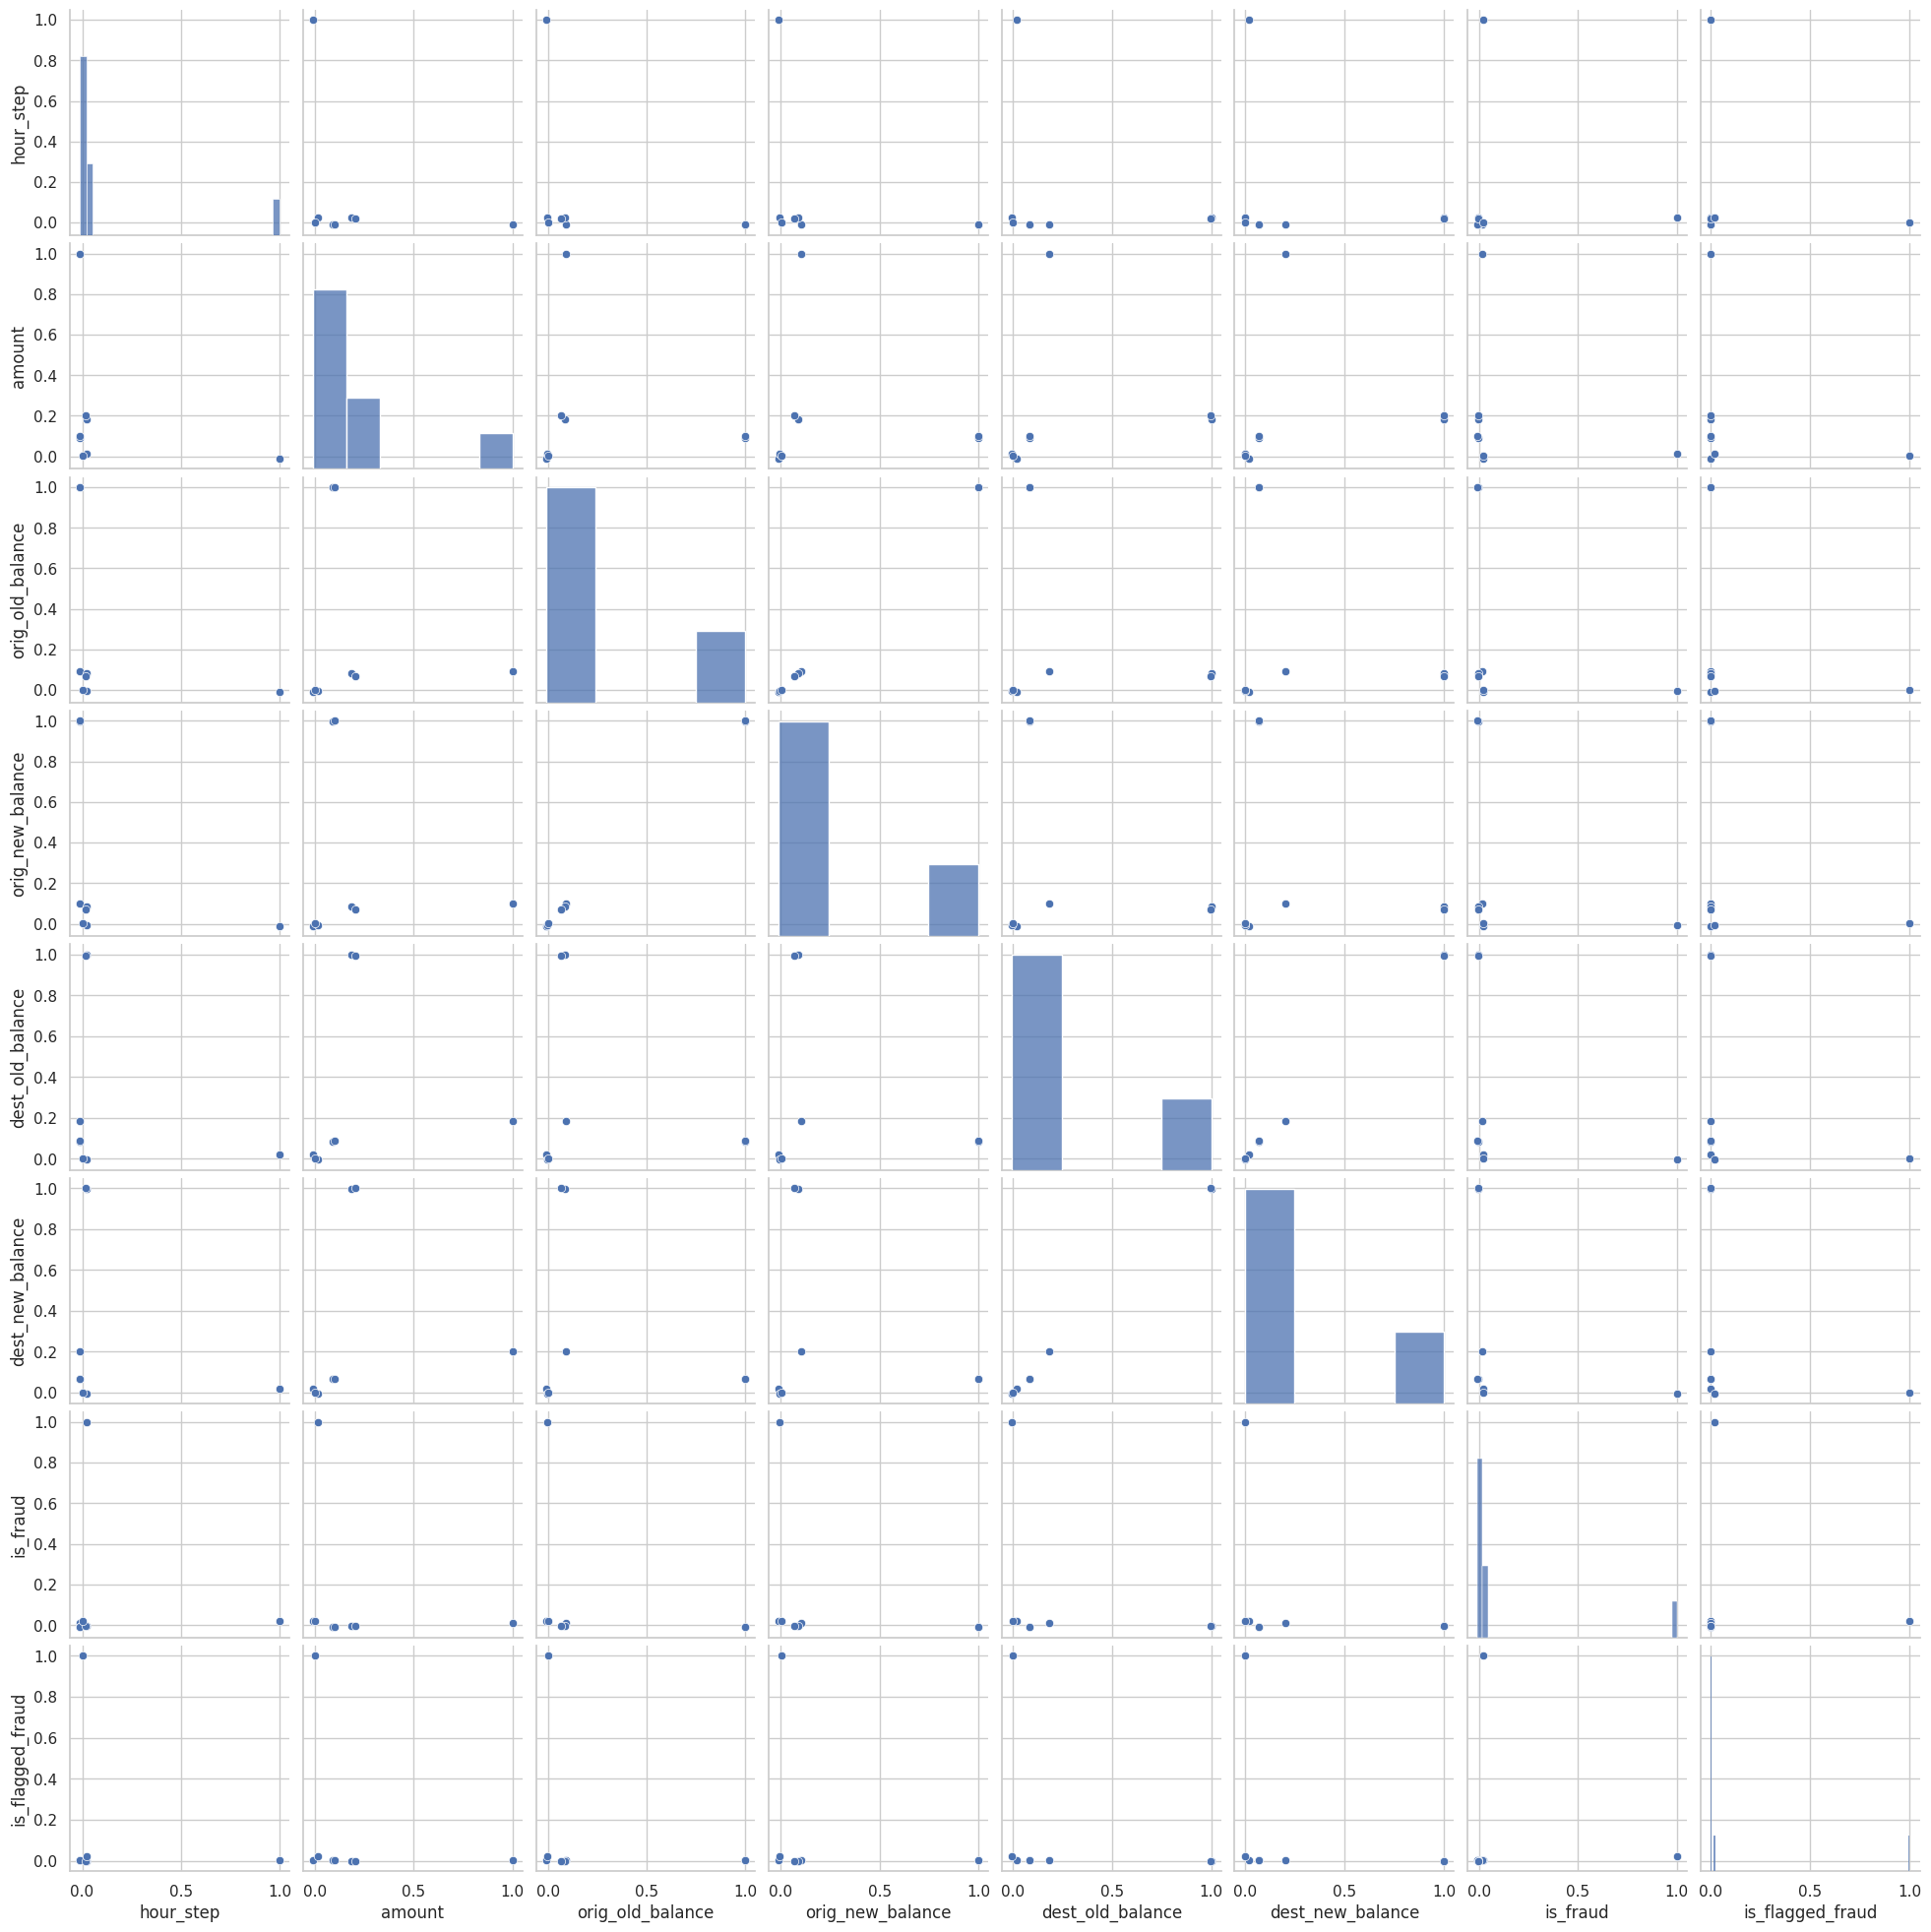

In [ ]:
sns.pairplot(correlacion1)

Como siguiente paso vamos a transformar nuestra variable que vamos a utilizar "trans_type" en numerica para poder manipular mejor nuestro algoritmo de ML.

A cada tipo de transacción le asignamos un numero del 1 al 5, con el cual serán etiquetadas.

In [ ]:
#Transformar las variables categoricas en númericas
df1['trans_type'] = df1['trans_type'].map( {
    'CASH_OUT': 1,
    'PAYMENT' : 2,
    'CASH_IN': 3,
    'TRANSFER': 4,
    'DEBIT': 5
})

In [ ]:
#Particionar datos
xL = np.array(df1[['trans_type', 'amount', 'orig_old_balance', 'orig_new_balance']])
yL = np.array(df1['is_fraud'])

In [ ]:
X_trainL, X_testL, Y_trainL, Y_testL = train_test_split(xL, yL, test_size = 0.4, random_state=5)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_trainL, Y_trainL)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_predict = lin_model.predict(X_trainL)
MSE = mean_squared_error(Y_trainL,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_testL)
MSE = (mean_squared_error(Y_testL, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.0010874501462438642
Pruebas: MSE =0.0011078269777746964


Nuestra variable dependiente, que en este caso es "is_fraud", que ya cuenta con las etiquetas de los registros de nuestro dataset, que nos ayudara a identificar futuros casos, será categorizada como

- 0: No fraude
- 1: Fraude

In [ ]:
df1['is_fraud'] = df1['is_fraud'].map({
    0: 'No Fraud',
    1: 'Fraud'
})

Verificamos que nuestro dataset se encuentre con los cambios ya hechos a nuestros datos.

In [ ]:
df1.head(5)

,hour_step,trans_type,amount,orig_client,orig_old_balance,orig_new_balance,dest_client,dest_old_balance,dest_new_balance,is_fraud,is_flagged_fraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


Para comenzar con la parte de Machine Learning, comenzamos con el proceso para particionar nuestros datos.

Siguiendo la teoría vista en clases decidimos hacer una partición de la siguiente manera:

- Entrenamiento: 60%
- Validación: 10%
- Pruebas: 30%


Utilizamos de variables independientes:
- trans_type
- amount
- orig_old_balance
- orig_new_balance

Y como variable dependiente:
- is_fraud

In [ ]:
#Particionar datos
x = np.array(df1[['trans_type', 'amount', 'orig_old_balance', 'orig_new_balance']])
y = np.array(df1['is_fraud'])

In [ ]:
#Funcion para particionar nuestro dataset
def particionar(entradas, salidas, percent_entrenamiento, percent_validacion, percent_prueba):
  temp_size = percent_validacion + percent_prueba
  print(temp_size)
  x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size=temp_size)
  if(percent_validacion > 0):
    test_size = percent_prueba / temp_size
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=test_size)
  else:
    return[x_train, None, x_temp, y_train, None, y_temp]
  return [x_train, x_val, x_test, y_train, y_val, y_test]

In [ ]:
#Asignamos los resultados de nuestra función a nuestras variables correspondientes
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.60,0.10,0.30)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

0.4
(3817572, 4)
(636262, 4)
(1908786, 4)


In [ ]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

Primero se intentó entrenar nuestro dataset utilizando el método de regresión lineal, sin embargo este no fue exitoso, debido a que nuestros datos estan etiquetados con una variable que solo tiene dos posibilidades, entonces el aplicar dicho método nos traería consigo mínimos locales, lo cual no sería adecuado para nuestro objetivo.

## **PRIMER MODELO: Árbol de decisiones**

Después se continuó con el método de arbol de decisiones, ya que como fue mencionado nuestro algoritmo cuenta con 2 etiquetas, entonces podría considerarse para ser un clasificador y un regresor, pero en este caso no lineal.

In [ ]:
#Primer modelo: ARBOL DE DECISIONES
ModelTree = DecisionTreeClassifier()
ModelTree.fit(x_train, y_train)
y_pred = ModelTree.predict(x_test)
print(ModelTree.score(x_test, y_test))

0.9996652322470931


In [ ]:
resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))
print("True positives: "+str(TP))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[   2161     355]
 [    284 1905986]]
True negatives: 2161
False positives: 355
False negative: 284
True positives: 1905986
Precision:99.96652322470932%
Sensibilidad:99.98510179565329%
Especificidad:85.89030206677265%


Obtenemos las medidas de error de nuestro modelo, las cuales son consideradas muy buenas. La medida más baja obtenida fue la de especificidad, y con este resultado podemos concluir que nuestro modelo falló más en clasificar los valores negativos.

## **SEGUNDO MODELO: Red Neuronal**

También se decidió probar el método de Red Neuronal, con una función de activación logistica, debido a que tenemos una clasificacion binaria, y al usar la una red neuronal como lo mencionamos anteriomente podemos evitar minimos locales.

In [ ]:
redNeuronal = MLPClassifier(hidden_layer_sizes=(4,2),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred_neural = redNeuronal.predict(x_test)
print(redNeuronal.score(x_test, y_test))
print("Entrenamiento completado!")

0.9986818847162542
Entrenamiento completado!


In [ ]:
resultado = confusion_matrix(y_test, y_pred_neural)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))
print("True positives: "+str(TP))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[      0    2516]
 [      0 1906270]]
True negatives: 0
False positives: 2516
False negative: 0
True positives: 1906270
Precision:99.86818847162542%
Sensibilidad:100.0%
Especificidad:0.0%


Nuestras medidas de error de precision y sensibilidad fueron muy altas, sin embargo nuestra medida de especificidad tuvo un gran fallo en la medida de especificidad.

No pudimos utilizar el método de procesamiento de imagenes, debido a que nuestro dataset no era adecuado para este método.
Sin embargo, podemos concluir que el método que resulto más idoneo para nuestro dataset, fue el de arboles de decisión porque nos entrego mejores resultados tanto en score como en las medidas de error.